# Day 3

# Final Submission will be at the bottom 

# Importing required Libraries

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,f1_score,roc_curve,accuracy_score
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
import itertools
from itertools import cycle

# Defining functions to plot confusion matrix

In [2]:
class_names = ["Non-Default", "Default"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
def plotConfusion(model, X, y):
    y_true, y_pred = y, model.predict(X)
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure(figsize=(5,5))
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure(figsize=(5,5))
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()

# Importing the Dataset

In [4]:
Dataframe = pd.read_csv("C:/Users/Dhanuka/data-storm-10/credit_card_default_train.csv")
test_set=pd.read_csv("C:/Users/Dhanuka/data-storm-10/credit_card_default_test.csv")

In [5]:
Dataframe.columns

Index(['Client_ID', 'Balance_Limit_V1', 'Gender', 'EDUCATION_STATUS',
       'MARITAL_STATUS', 'AGE', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP',
       'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY',
       'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
       'PAID_AMT_DEC', 'NEXT_MONTH_DEFAULT'],
      dtype='object')

# Renaming the Dataset as test and train

In [6]:
id_train = Dataframe.iloc[:,0:1]

In [7]:
X_train = Dataframe.iloc[:,1:24]

In [114]:
id_test = test_set.iloc[:,0:1]

In [9]:
X_test = test_set.iloc[:,1:]

In [10]:
Y_train = Dataframe.iloc[:,24:]

# Concatenating the Test and Train datasets for OneHotEncoding

In [11]:
Total_set=pd.concat([X_train,X_test],axis=0)

In [12]:
dummies_Gender=pd.get_dummies(Total_set['Gender'],prefix='Gender')
dummies_EDUCATION_STATUS= pd.get_dummies(Total_set['EDUCATION_STATUS'], prefix= 'EDUCATION_STATUS') 
dummies_MARITAL_STATUS= pd.get_dummies(Total_set['MARITAL_STATUS'], prefix= 'MARITAL_STATUS')
dummies_AGE= pd.get_dummies(Total_set['AGE'], prefix= 'AGE')

In [13]:
Total_set = pd.concat([Total_set, dummies_Gender, dummies_EDUCATION_STATUS, dummies_MARITAL_STATUS, dummies_AGE,], axis=1)
Total_set = Total_set.drop(['Gender','EDUCATION_STATUS','MARITAL_STATUS','AGE'], axis=1)

In [14]:
Total_set.shape

(30000, 30)

In [15]:
Total_set.columns

Index(['Balance_Limit_V1', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP',
       'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY',
       'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
       'PAID_AMT_DEC', 'Gender_F', 'Gender_M', 'EDUCATION_STATUS_Graduate',
       'EDUCATION_STATUS_High School', 'EDUCATION_STATUS_Other',
       'MARITAL_STATUS_Other', 'MARITAL_STATUS_Single', 'AGE_31-45',
       'AGE_46-65', 'AGE_Less than 30', 'AGE_More than 65'],
      dtype='object')

# Resplitting the data as Test and Train

In [16]:
x_train=Total_set.iloc[:24000]
x_test=Total_set.iloc[24000:]

# Changing the variable Balance_Limit to a number

In [17]:
for i in range(24000):
    if x_train['Balance_Limit_V1'][i][-1]=='M':
        x_train.loc[i:i,('Balance_Limit_V1')]=float(x_train['Balance_Limit_V1'][i][:-1])*1000000
    else:
        x_train.loc[i:i,('Balance_Limit_V1')]=float(x_train['Balance_Limit_V1'][i][:-1])*1000

c:\users\dhanuka\anaconda3\envs\mlenv\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [18]:
for i in range(6000):
    if x_test['Balance_Limit_V1'][i][-1]=='M':
        x_test.loc[i:i,('Balance_Limit_V1')]=float(x_test['Balance_Limit_V1'][i][:-1])*1000000
    else:
        x_test.loc[i:i,('Balance_Limit_V1')]=float(x_test['Balance_Limit_V1'][i][:-1])*1000

# Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

# Using XG Boost

c:\users\dhanuka\anaconda3\envs\mlenv\lib\site-packages\sklearn\model_selection\_split.py:629: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
c:\users\dhanuka\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal number of features : 11


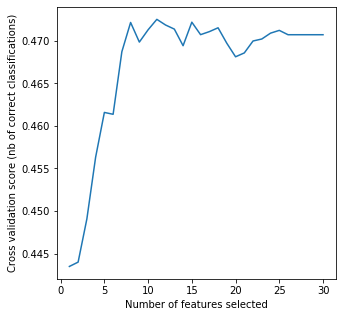

In [19]:
from xgboost import XGBClassifier
clf=XGBClassifier()
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(),scoring='f1')
rfecv.fit(x_train, Y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

plt.figure(figsize=(5,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [20]:
rfecv.grid_scores_

array([0.44348896, 0.44399772, 0.44907512, 0.45631733, 0.46157898,
       0.46136247, 0.46871218, 0.47214692, 0.46984301, 0.47128591,
       0.47251264, 0.47184753, 0.47136754, 0.46941663, 0.47217914,
       0.47071487, 0.47106885, 0.47152177, 0.46970522, 0.46811533,
       0.46857023, 0.46997169, 0.47020457, 0.47089224, 0.47121789,
       0.47070762, 0.47070762, 0.47070762, 0.47070762, 0.47070762])

In [21]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [22]:
rfecv.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  2,  3,  8,  9, 15, 11,  1,  1,  1,  1,
       10,  4,  5, 19, 12, 13, 16,  6, 18, 20,  7, 17, 14])

In [23]:
features=list(x_train.columns.values[rfecv.support_])

In [24]:
features

['Balance_Limit_V1',
 'PAY_JULY',
 'PAY_AUG',
 'PAY_SEP',
 'PAY_OCT',
 'PAY_NOV',
 'PAY_DEC',
 'PAID_AMT_JULY',
 'PAID_AMT_AUG',
 'PAID_AMT_SEP',
 'PAID_AMT_OCT']

# Creating a set with these features

In [25]:
x_train_2=x_train[features]

# Characteristics of predict Variables with Target Variables

In [26]:
Dataframe_for_graphs=pd.concat([x_train_2,Y_train],axis=1)

In [27]:
Dataframe_for_graphs

,Balance_Limit_V1,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,NEXT_MONTH_DEFAULT
0,1000000,-1,-1,-1,-1,-1,-1,3437,6004,39418,162772,0
1,1000000,0,-1,-1,-1,-1,0,151818,46200,43530,80811,0
2,100000,4,3,2,2,-2,-2,0,0,0,0,1
3,200000,2,0,0,0,0,0,3855,3890,3696,4620,1
4,1000000,2,2,0,0,0,0,0,20790,16170,17325,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23995,1000000,0,0,0,0,0,0,19635,46200,11557,7039,0
23996,400000,-1,-1,-1,-1,0,0,4243,8145,20785,298,0
23997,100000,4,3,2,-1,0,0,0,0,50820,9702,1
23998,200000,1,-1,0,0,0,-1,198429,7875,2721,4449,1


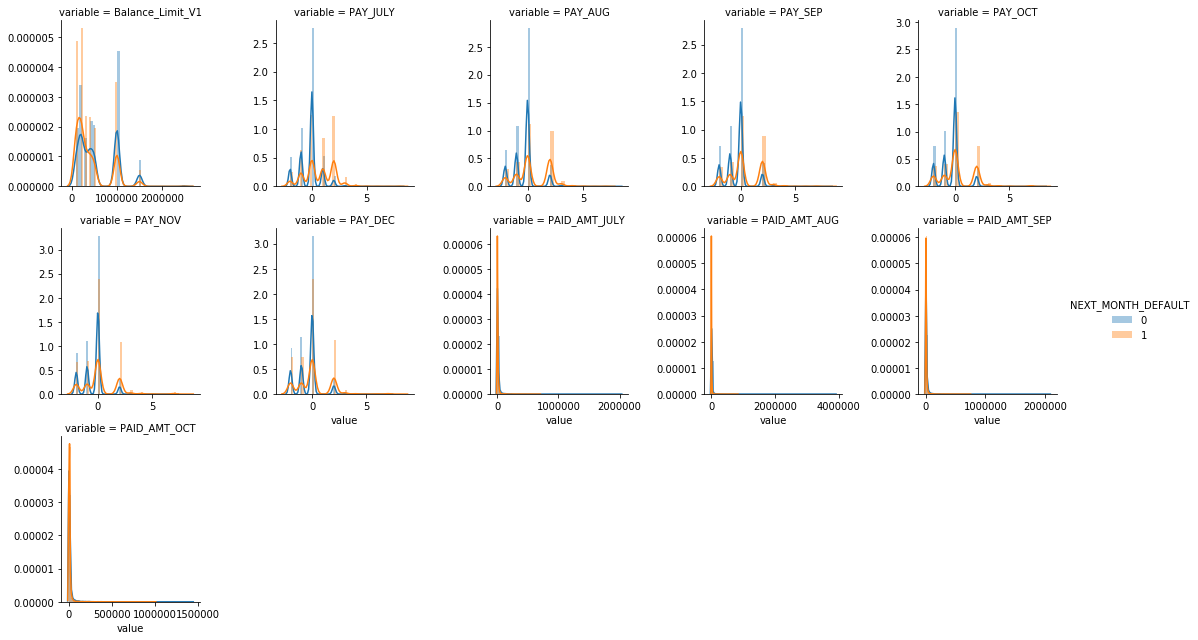

In [28]:
f = pd.melt( Dataframe_for_graphs, id_vars='NEXT_MONTH_DEFAULT', value_vars=features)
g = sns.FacetGrid( f, hue='NEXT_MONTH_DEFAULT', col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

In [29]:
Features_Selected=['Balance_Limit_V1', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT','PAY_NOV', 'PAY_DEC']


# Splitting dataset as test and validation

In [31]:
from sklearn.model_selection import train_test_split
x_train_xgb, x_validation_xgb, y_train, y_validation = train_test_split(x_train_2, Y_train, test_size = 0.2,random_state=42)

In [32]:
x_train_xgb1=x_train_xgb[Features_Selected]
x_validation_xgb1=x_validation_xgb[Features_Selected]

In [34]:
from sklearn.preprocessing import StandardScaler
scX = StandardScaler()
x_train_xgb1 = scX.fit_transform( x_train_xgb1 )
x_validation_xgb1 = scX.transform( x_validation_xgb1 )

In [35]:
x_train_xgb1

array([[-0.54321498,  0.01147421,  0.10586054, ...,  0.1849431 ,
         0.23135051,  0.25163461],
       [ 1.19077926, -0.87685194, -0.72340194, ..., -0.67131625,
         0.23135051,  0.25163461],
       [-0.79092845,  0.89980037,  1.7643855 , ...,  0.1849431 ,
         0.23135051,  0.25163461],
       ...,
       [ 1.19077926, -0.87685194, -0.72340194, ...,  0.1849431 ,
        -0.65068479, -0.61685083],
       [-0.54321498,  0.01147421,  0.10586054, ...,  0.1849431 ,
         0.23135051,  0.25163461],
       [ 2.42934658,  0.01147421,  0.10586054, ...,  0.1849431 ,
         0.23135051, -1.48533626]])

In [36]:
x_validation_xgb1

array([[-0.04778806, -0.87685194,  0.10586054, ...,  0.1849431 ,
        -0.65068479, -0.61685083],
       [-0.29550152,  0.01147421,  0.10586054, ...,  1.89746179,
         0.23135051,  0.25163461],
       [-0.79092845,  0.01147421,  0.10586054, ...,  0.1849431 ,
        -0.65068479, -0.61685083],
       ...,
       [ 1.19077926,  1.78812652,  0.10586054, ...,  0.1849431 ,
         0.23135051,  0.25163461],
       [-1.03864191, -0.87685194, -0.72340194, ...,  0.1849431 ,
         0.23135051, -0.61685083],
       [-0.79092845,  0.01147421,  0.10586054, ...,  0.1849431 ,
         0.23135051,  0.25163461]])

# Predictions Using Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
regressor2 = RandomForestClassifier(n_estimators = 100, criterion = "gini", max_depth = 10,
                                     max_features = "auto", min_samples_leaf = 0.005,
                                     min_samples_split = 0.005, n_jobs = -1, random_state = 216)

In [39]:
regressor2.fit(x_train_xgb1,y_train)
pred_ran=regressor2.predict(x_validation_xgb1)
print(classification_report(y_validation,pred_ran))
print('Accuracy is: ',accuracy_score(y_validation,pred_ran))
print('f1_score is: ',f1_score(y_validation,pred_ran))

c:\users\dhanuka\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


              precision    recall  f1-score   support

           0       0.85      0.95      0.90      3745
           1       0.70      0.38      0.50      1055

    accuracy                           0.83      4800
   macro avg       0.77      0.67      0.70      4800
weighted avg       0.81      0.83      0.81      4800

Accuracy is:  0.8285416666666666
f1_score is:  0.4960195958358849


Confusion matrix, without normalization
[[3572  173]
 [ 650  405]]
Normalized confusion matrix
[[0.95 0.05]
 [0.62 0.38]]


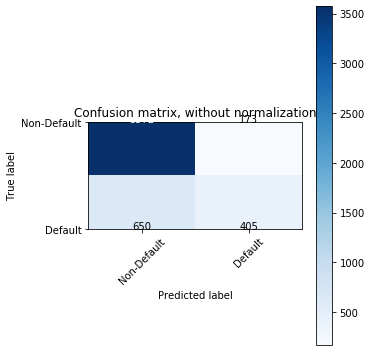

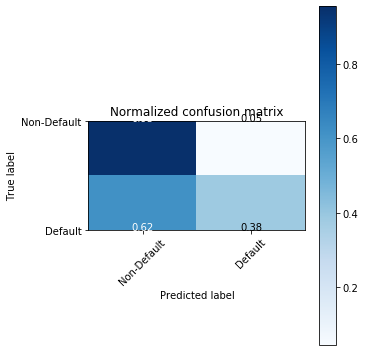

In [40]:
plotConfusion(regressor2,x_validation_xgb1,y_validation)

# importing libraries for fine tunning XGBoost for F1_score

In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
import pandas as pd
from skopt import gp_minimize
from skopt.space import Real, Integer
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from functools import partial

In [91]:
space = [
    Real(0.6, 0.7, name="colsample_bylevel"),
    Real(0.6, 0.7, name="colsample_bytree"),
    Real(0.01, 1, name="gamma"),
    Real(0.0001, 1, name="learning_rate"),
    Real(0.1, 10, name="max_delta_step"),
    Integer(6, 15, name="max_depth"),
    Real(10, 500, name="min_child_weight"),
    Integer(10, 300, name="n_estimators"),
    Real(0.1, 100, name="reg_alpha"),
    Real(0.1, 100, name="reg_lambda"),
    Real(0.4, 0.7, name="subsample"),
]

In [92]:
def return_model_assessment(args, X_train, y_train, X_test,y_test):
    global models, train_scores, test_scores, curr_model_hyper_params
    params = {curr_model_hyper_params[i]: args[i] for i, j in enumerate(curr_model_hyper_params)}
    model = XGBClassifier(random_state=42, seed=42)
    model.set_params(**params)
    fitted_model = model.fit(X_train, y_train, sample_weight=None)
    models.append(fitted_model)
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    train_score = f1_score(train_predictions, y_train)
    test_score = f1_score(test_predictions, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    return 1 - test_score

In [93]:
x_train_xgb1.shape

(19200, 7)

In [94]:
models = []
train_scores = []
test_scores = []
curr_model_hyper_params = ['colsample_bylevel', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step',
                        'max_depth', 'min_child_weight', 'n_estimators', 'reg_alpha', 'reg_lambda', 'subsample']
objective_function = partial(return_model_assessment, X_train=x_train_xgb1, y_train=y_train, X_test=x_validation_xgb1,y_test=y_validation)

# running the algorithm
n_calls = 100 # number of times you want to train your model
results = gp_minimize(objective_function, space, base_estimator=None, n_calls=100, n_random_starts=n_calls-1, random_state=42)

c:\users\dhanuka\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no true samples.

c:\users\dhanuka\anaconda3\envs\mlenv\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\users\dhanuka\anaconda3\envs\mlenv\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [95]:
import plotly.express as px
metrics = pd.DataFrame(train_scores + test_scores)
metrics.loc[:,'dataset'] = ["train_score"]*n_calls + ["test_score"]*n_calls
metrics.loc[:,'Iteration Number'] = list(range(1,n_calls+1)) + list(range(1,n_calls+1))
metrics.columns = ["F1 Score", "dataset", "Iteration Number"]
fig = px.line(metrics, x="Iteration Number", y="F1 Score", color="dataset")
fig.show()

In [99]:
xgb=models[test_scores.index(max(test_scores))]

In [100]:
xgb

XGBClassifier(base_score=0.5, booster='gbtree',
              colsample_bylevel=0.6967580551520247, colsample_bynode=1,
              colsample_bytree=0.6547971883248087, gamma=0.4292362328850375,
              learning_rate=0.5685634317215834,
              max_delta_step=5.801653295055038, max_depth=13,
              min_child_weight=72.56796741700816, missing=None, n_estimators=83,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=42, reg_alpha=58.09634683315661,
              reg_lambda=86.72494906025125, scale_pos_weight=1, seed=42,
              silent=None, subsample=0.5685600076431321, verbosity=1)

In [101]:
xgb.fit(x_train_xgb1,y_train)
pred_xgb=xgb.predict(x_validation_xgb1)
print(classification_report(y_validation,pred_xgb))
print('Accuracy is: ',accuracy_score(y_validation,pred_xgb))
print('f1_score is: ',f1_score(y_validation,pred_xgb))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      3745
           1       0.69      0.40      0.51      1055

    accuracy                           0.83      4800
   macro avg       0.77      0.68      0.70      4800
weighted avg       0.81      0.83      0.81      4800

Accuracy is:  0.8289583333333334
f1_score is:  0.5080886758538047


Confusion matrix, without normalization
[[3555  190]
 [ 631  424]]
Normalized confusion matrix
[[0.95 0.05]
 [0.6  0.4 ]]


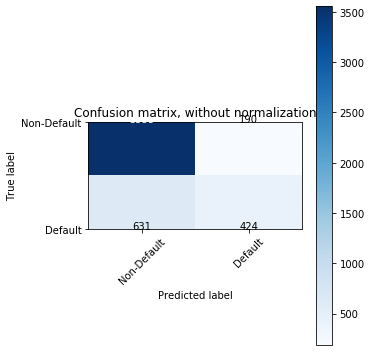

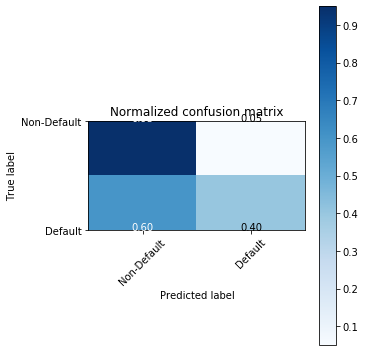

In [102]:
plotConfusion(xgb,x_validation_xgb1,y_validation)

In [103]:
x_test_sub=x_test[Features_Selected]

In [104]:
x_train_xgb1 = scX.fit_transform( x_train_xgb1 )
x_validation_xgb1 = scX.transform( x_validation_xgb1)
x_test_sub=scX.transform(x_test_sub)

In [110]:
y_test_pred=xgb.predict(x_test_sub)

In [111]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [115]:
id_test=id_test['Client_ID']

In [116]:
Test_dataframe=pd.DataFrame({'Client_ID':id_test,'NEXT_MONTH_DEFAULT':y_test_pred})

In [117]:
Test_dataframe.to_csv('Day3_submission_7_try.csv',index=False)